# CREDIT CARD FRAUD DETECTION

### CONTEXT

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


## Objective
* To predict whether a card transaction is fraudulent or not.
* Which variables are most significant.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

#libraries to help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# For pandas profiling
from pandas_profiling import ProfileReport

## Import Dataset

In [2]:
transactions = pd.read_csv("creditcard.csv")

### View the first and last 5 rows of the dataset.

In [3]:
transactions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# copying data to another variable to avoid any changes to original data
data = transactions.copy()

### Understand the shape of the dataset.

In [5]:
data.shape

(284807, 31)

* The dataset has 284807 rows and 31 columns

### Check the data types of the columns for the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* Every column in the data is a numeric column.
* There are no null values in the data.

### Summary of the dataset.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


* The minimum value for amount is 0, while the maximum value is 25691.16
* The minimum value for time is 0, while the maximum value is 172792.00

# EDA

## Univariate analysis

In [8]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Time

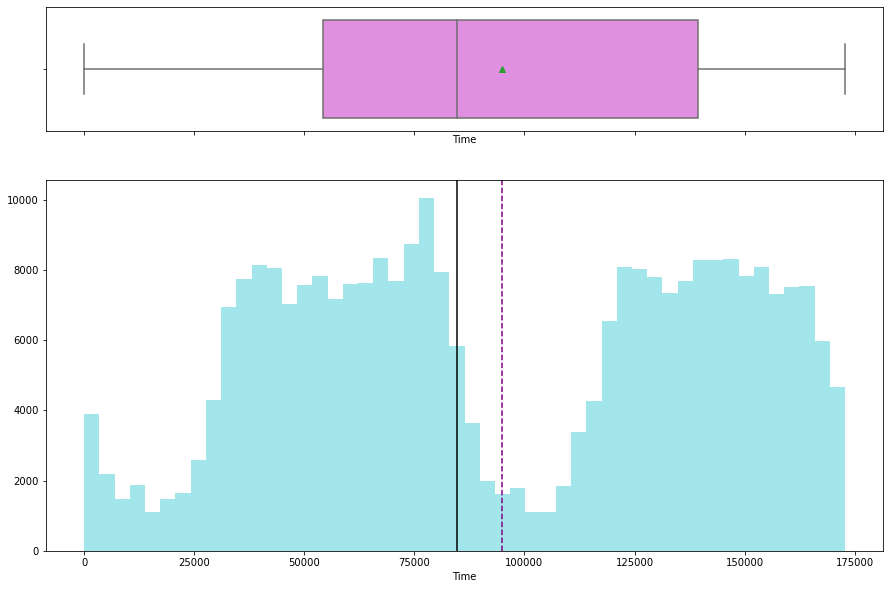

In [9]:
histogram_boxplot(data['Time'])

Time column is symmetrical at around 100,000 and at around 12,500

### Observations on Amount

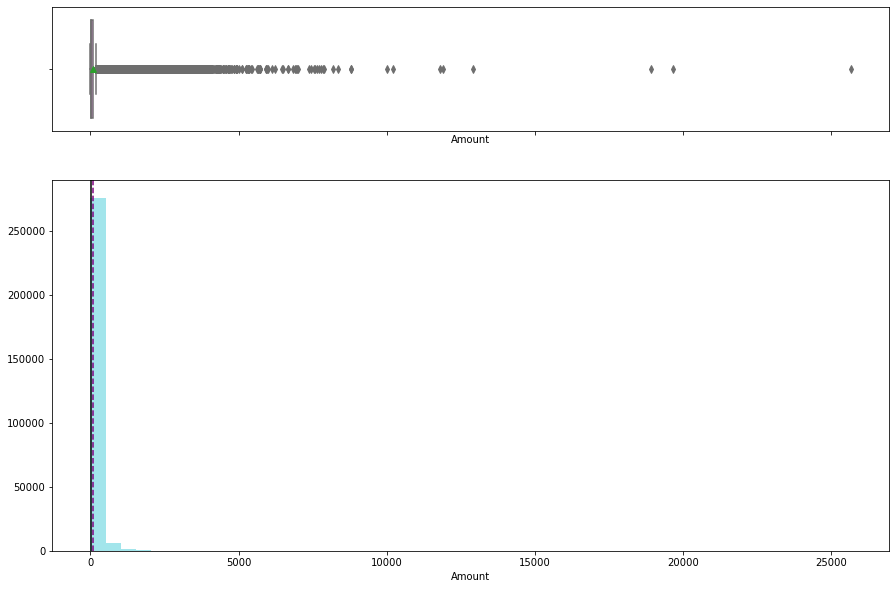

In [10]:
histogram_boxplot(data['Amount'])

* A lot of outliers are present in the amount columns, these values are potential fraudulent activities
* The same can be done for other colums from V1 to V28

## Bivariate Analysis

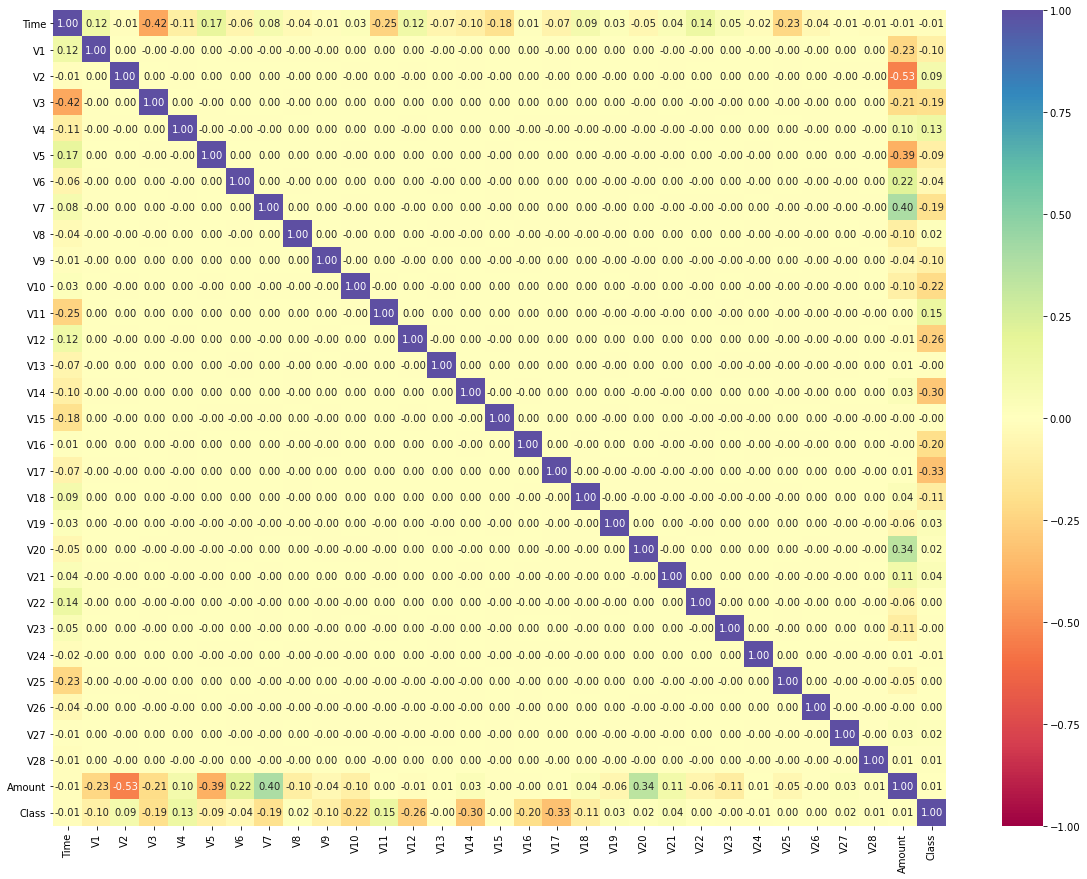

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* The features are not very correlated with one another.

In [12]:
### Function to plot distributions and Boxplots of transactions
def plot(x,target='Class'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of Fraudulent Transactions')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title("Distribution of Non Fraudulent Transactions")
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Fraudulent Transactions')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Fraudulent Transactions - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

### Distribution of time column

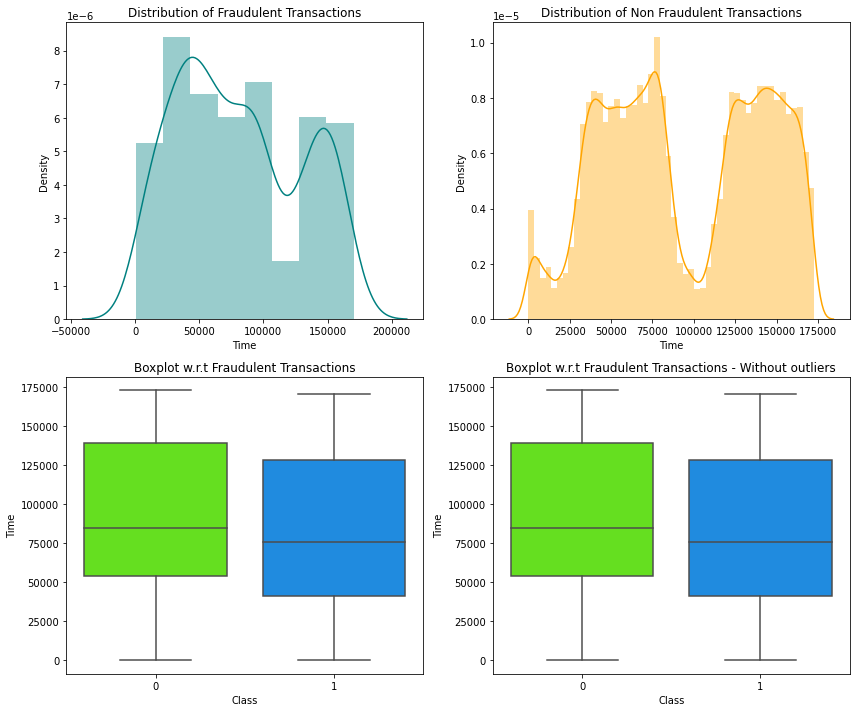

In [13]:
plot('Time')

### Distribution of amount column

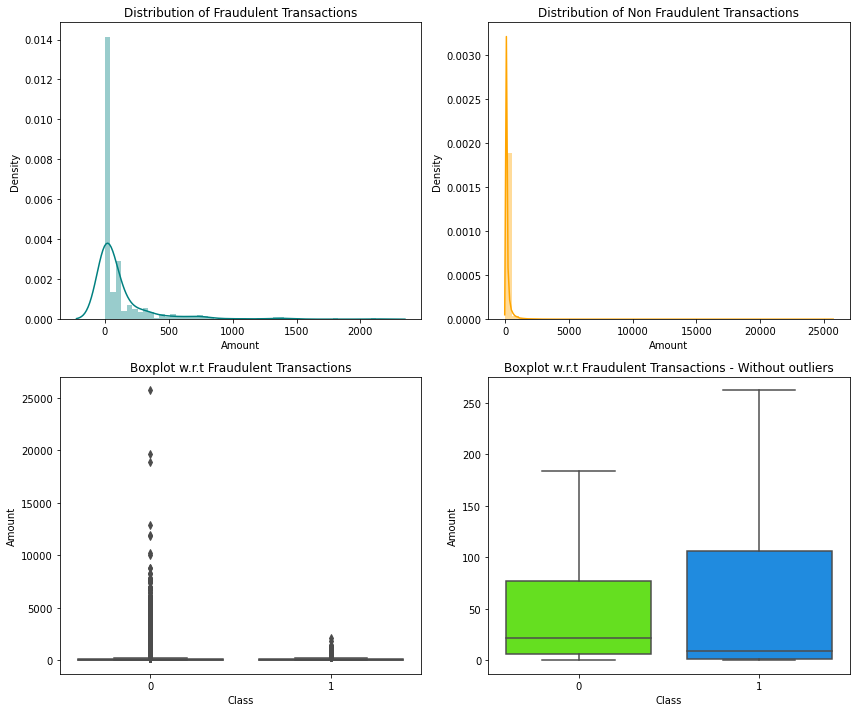

In [15]:
plot('Amount')

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a transaction is fraudulent wehereas it is not
2. Predicting a transaction is not fraudulent whereas it is fraudulent

### Which case is more important? 
* Predicting a transaction is not fraudulent whereas it is fraudulent

### How to reduce this loss i.e need to reduce False Negatives?
* The bank or institution would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [20]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score1(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
   # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("ROC-AUC Score on training set:",metrics.roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set:",metrics.roc_auc_score(test_y,pred_test))
    return score_list # returning the list with train and test scores

In [21]:
## Defining a function for better visualization of confusion matrix
def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    data_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(data_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

### Let's build model using Statsmodels

### Before making the model, first let's check if our variables has multicollinearity

* There are different ways of detecting (or testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [14]:
X = data.drop(['Class'], axis=1)
Y = data[['Class']] 

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [15]:
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [16]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const     10.065370
Time       1.879865
V1         1.651908
V2         4.422390
V3         1.877342
V4         1.138061
V5         2.859316
V6         1.571530
V7         2.929040
V8         1.131633
V9         1.023894
V10        1.126333
V11        1.115328
V12        1.030070
V13        1.008474
V14        1.031854
V15        1.063421
V16        1.000448
V17        1.010701
V18        1.031048
V19        1.039643
V20        2.399180
V21        1.140305
V22        1.089101
V23        1.158142
V24        1.000806
V25        1.130801
V26        1.003359
V27        1.010105
V28        1.001433
Amount    12.116701
dtype: float64



* Amount and V2 seems to be highly correlated, so we will drop one of them depending on which has less effect on making predictions.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30, random_state = 1)

In [22]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

print(lg.summary())

print('')
# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test,flag=True)

Optimization terminated successfully.
         Current function value: 0.003877
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199333
Method:                           MLE   Df Model:                           30
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                  0.7044
Time:                        10:18:04   Log-Likelihood:                -772.85
converged:                       True   LL-Null:                       -2614.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1197      0.286    -28.420      0.000      -8.680      -7.560
Time       -7.872e-06   2.75

In [24]:
X_train1 = X_train.drop('Amount', axis = 1)
X_test1 = X_test.drop('Amount', axis = 1)

logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.003891
         Iterations 13


In [25]:
# Let's check model performances for this model
scores_LR = get_metrics_score1(lg1,X_train1,X_test1,y_train,y_test,flag=True)

Accuracy on training set :  0.9992526233422283
Accuracy on test set :  0.9991807403766253
Recall on training set :  0.6582633053221288
Recall on test set :  0.5851851851851851
Precision on training set :  0.8969465648854962
Precision on test set :  0.8494623655913979
ROC-AUC Score on training set: 0.829063815851304
ROC-AUC Score on test set: 0.7925105369823332


In [27]:
X_train2 = X_train.drop('V2', axis = 1)
X_test2 = X_test.drop('V2', axis = 1)

logit2 = sm.Logit(y_train, X_train2)
lg2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.003877
         Iterations 13


In [28]:
# Let's check model performances for this model
scores_LR = get_metrics_score1(lg2,X_train2,X_test2,y_train,y_test,flag=True)

Accuracy on training set :  0.999247607391505
Accuracy on test set :  0.9991573329588147
Recall on training set :  0.6554621848739496
Recall on test set :  0.5777777777777777
Precision on training set :  0.896551724137931
Precision on test set :  0.8387096774193549
ROC-AUC Score on training set: 0.8276632556272142
ROC-AUC Score on test set: 0.788800972163611


The models performance improved when the 'Amount' column was dropped for lg1. So we will use lg1 as base model.

### Let's check VIF score again

In [23]:
num_feature_set = num_feature_set.drop(['Amount'], axis = 1)
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const    8.493197
Time     1.879717
V1       1.025906
V2       1.000211
V3       1.330979
V4       1.020827
V5       1.056305
V6       1.007464
V7       1.013490
V8       1.002566
V9       1.000141
V10      1.001762
V11      1.115321
V12      1.029065
V13      1.008164
V14      1.018333
V15      1.063262
V16      1.000266
V17      1.010099
V18      1.015374
V19      1.001578
V20      1.004863
V21      1.003762
V22      1.039010
V23      1.004916
V24      1.000492
V25      1.102120
V26      1.003223
V27      1.000050
V28      1.000167
dtype: float64



The multicolinearity from the columns have been removed and now have VIFs less than 5

### Metrics of final logistic model (lg1)

In [30]:
print(lg1.summary())

print('')

# Model performance

scores_LR = get_metrics_score1(lg1,X_train1.astype(float),X_test1.astype(float),y_train,y_test,flag=True)

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199334
Method:                           MLE   Df Model:                           29
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                  0.7034
Time:                        15:58:20   Log-Likelihood:                -775.63
converged:                       True   LL-Null:                       -2614.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0214      0.283    -28.349      0.000      -8.576      -7.467
Time       -7.777e-06   2.75e-06     -2.825      0.005   -1.32e-05   -2.38e-06
V1             0.0698      0.050      1.392      0.1

* ROC-AUC on training set

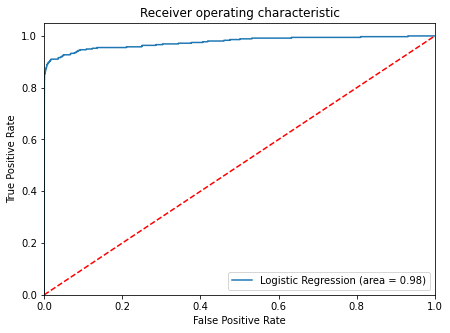

In [68]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

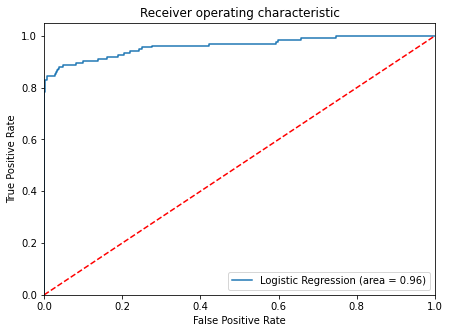

In [69]:
logit_roc_auc_test = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Coefficient interpretations

* Coefficients of V1, V4, V5, V12, V18, V19, V21, V22, V26 are positive, so an increase in the value of these columns increases the chances that a transaction is fraudulent.
* Coefficients for V2, V3, V6, V7, V8, V9, V10, V11, V13, V14, V15, V16, V17, V20, V23, V24, V25, V27, V28, and time are negative meaning that an increase in its values decreases the chances of a transacction being fraudulent.
* V10, V14, V27, V22, V21 are the most important variables from the logistic regression model.
* Similarly we can interpret for other attributes.

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.96 on training and test set is quite good.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [70]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg1.predict(X_test1.astype(float)))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.0017854847952167836


In [71]:
# Model prediction with optimal threshold
pred_train_opt = (lg1.predict(X_train1.astype(float)) > optimal_threshold).astype(int)
pred_test_opt = (lg1.predict(X_test1.astype(float)) > optimal_threshold).astype(int)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.9618637266507494
Accuracy on test data: 0.9616586496260665
Recall on train data: 0.9159663865546218
Recall on test data: 0.8740740740740741
Precision on train data: 0.041392405063291136
Precision on test data: 0.034942256440627775
ROC-AUC Score on train data: 0.9389562243767194
ROC-AUC Score on test data: 0.9179356631916767


* Recall increased from on the test set to 0.874, as compared to the previous model which was 0.585.
* As we will decrease the threshold value, Recall will keep on increasing but the Precision will decrease, but that's not right because it will lead to loss of resources, we need to choose an optimal balance between recall and precision.
* Area under the curve is has decreased as compared to the initial model.

#### Let's use Precision-Recall curve and see if we can find a better threshold

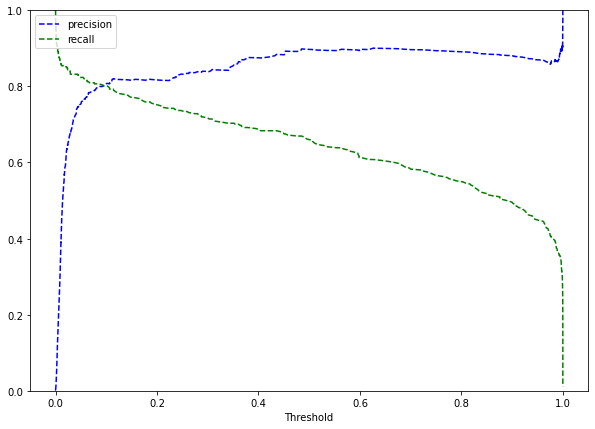

In [72]:
y_scores=lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.085 threshold we get a higher recall and a good precision.

In [73]:
optimal_threshold = 0.085

# Model prediction with optimal threshold
pred_train_opt = (lg1.predict(X_train1.astype(float)) > optimal_threshold).astype(int)
pred_test_opt = (lg1.predict(X_test1.astype(float)) > optimal_threshold).astype(int)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.9992927509480147
Accuracy on test data: 0.9992509626300574
Recall on train data: 0.8067226890756303
Recall on test data: 0.7407407407407407
Precision on train data: 0.8
Precision on test data: 0.7751937984496124
ROC-AUC Score on train data: 0.9031804463784538
ROC-AUC Score on test data: 0.8702003980348332


* Model is performing well on training and test set.
* Model has given a balanced performance, if the company wishes to maintain a balance between recall and precision this model can be used.
* Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set.

# Decision Trees

## Split data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [65]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [66]:
prob_train = dTree.predict_proba(X_train)
pred_train = dTree.predict(X_train)

prob_test = dTree.predict_proba(X_test)
pred_test = dTree.predict(X_test)

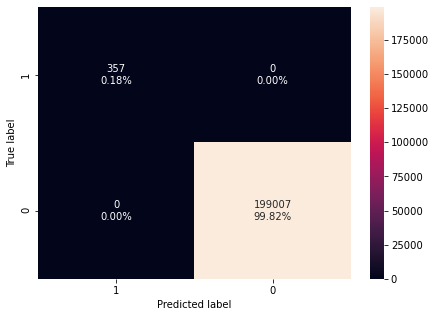

In [67]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train)

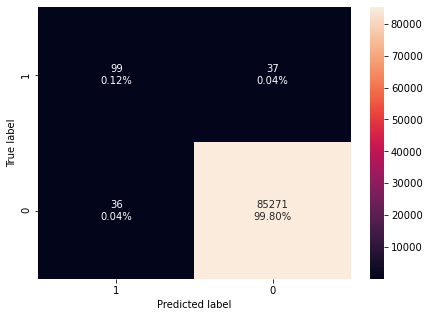

In [68]:
# let us make confusion matrix on test set
make_confusion_matrix(y_test,pred_test)

In [69]:
# Let's check model performances for this model
score_DT = get_metrics_score1(dTree, X_train, X_test, y_train, y_test, flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9991456292499094
Recall on training set :  1.0
Recall on test set :  0.7333333333333333
Precision on training set :  1.0
Precision on test set :  0.7279411764705882


* Model has performed very well on training and test set.
* There's slight overfitting in terms of recall and recall, let's see if pruning methods can help in improving the metrics. 
* Area under the curve is also 0.72794 is not so good.

## Visualizing the Decision Tree

In [70]:
feature_names = list(X.columns)
print(feature_names)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


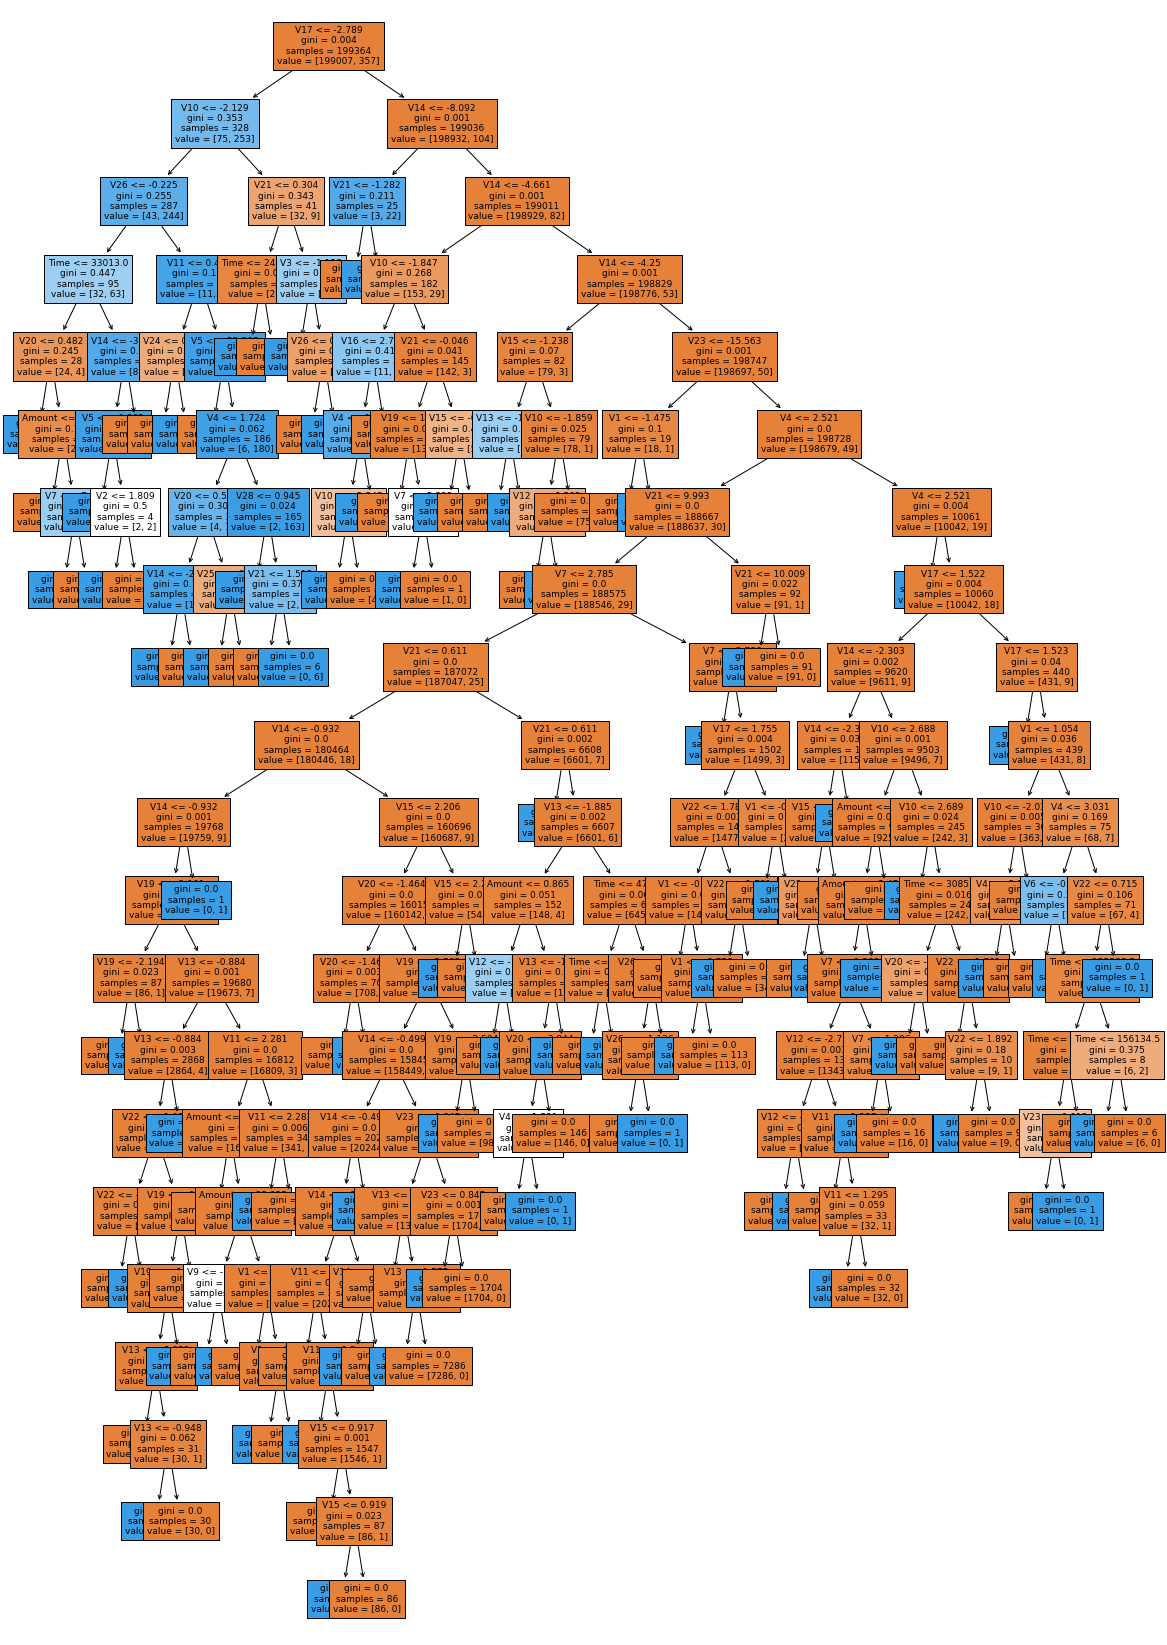

In [71]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [72]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- V17 <= -2.79
|   |--- V10 <= -2.13
|   |   |--- V26 <= -0.22
|   |   |   |--- Time <= 33013.00
|   |   |   |   |--- V20 <= 0.48
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- V20 >  0.48
|   |   |   |   |   |--- Amount <= 94.99
|   |   |   |   |   |   |--- weights: [23.00, 0.00] class: 0
|   |   |   |   |   |--- Amount >  94.99
|   |   |   |   |   |   |--- V7 <= -7.56
|   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- V7 >  -7.56
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- Time >  33013.00
|   |   |   |   |--- V14 <= -3.09
|   |   |   |   |   |--- V5 <= -0.06
|   |   |   |   |   |   |--- weights: [0.00, 57.00] class: 1
|   |   |   |   |   |--- V5 >  -0.06
|   |   |   |   |   |   |--- V2 <= 1.81
|   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- V2 >  1.81
|   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   | 

In [73]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

             Imp
V17     0.549237
V14     0.095711
V10     0.086110
Time    0.042388
V21     0.028209
V4      0.019497
V26     0.018988
V20     0.015216
V11     0.013917
V15     0.013532
V13     0.013315
V22     0.013269
V1      0.012384
V16     0.011963
Amount  0.011054
V19     0.009804
V7      0.008890
V5      0.007822
V12     0.006775
V3      0.005238
V23     0.004823
V2      0.002806
V6      0.002105
V24     0.002105
V25     0.002105
V9      0.001403
V28     0.001335
V18     0.000000
V8      0.000000
V27     0.000000


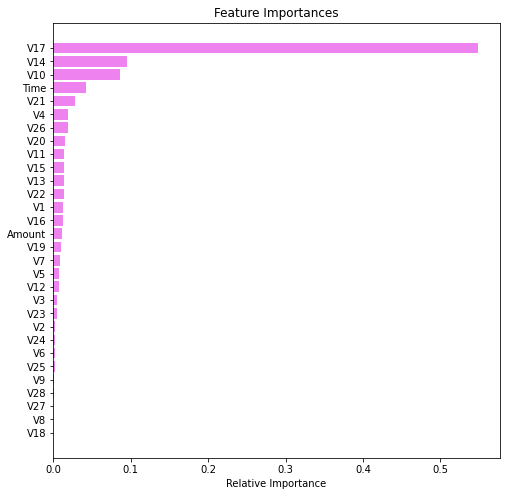

In [74]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation

* V17, V14, V10 are the most important features from the decision tree
* V18, V8, V9 have very little importance
* But people having V17 less than -2.789, V10 less than and V26 less than -0.22, have greater chances of being a fraudulent transaction.

## Reducing overfitting (Regularization)

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting

### Let's try Grid search
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in then
hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Gridsearch
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [75]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(6,15), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=3, random_state=1)

In [76]:
prob_train = estimator.predict_proba(X_train)
pred_train = estimator.predict(X_train)

prob_test = estimator.predict_proba(X_test)
pred_test = estimator.predict(X_test)

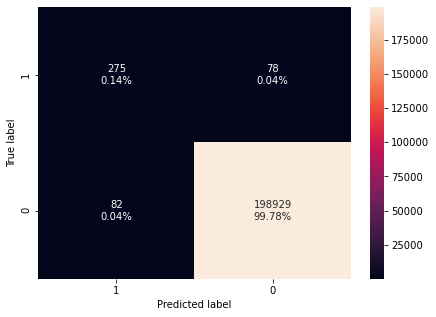

In [77]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train, pred_train)

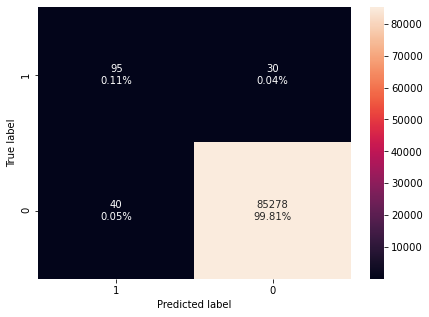

In [78]:
# let us make confusion matrix on test set
make_confusion_matrix(y_test,pred_test)

In [79]:
# Let's check model performances for this model
scores_DT = get_metrics_score2(estimator,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  0.999197447884272
Accuracy on test set :  0.9991807403766253
Recall on training set :  0.7703081232492998
Recall on test set :  0.7037037037037037
Precision on training set :  0.7790368271954674
Precision on test set :  0.76
ROC-AUC Score on training set: 0.8849580886186752
ROC-AUC Score on test set: 0.8516760184012963


The overfitting in terms of precision and recall has been reduced, while the ROC-AUC curve has reduced to 0.85167

The value of precision and recall for both train and test respectively have values close to each other, indicating the removal of overfitting

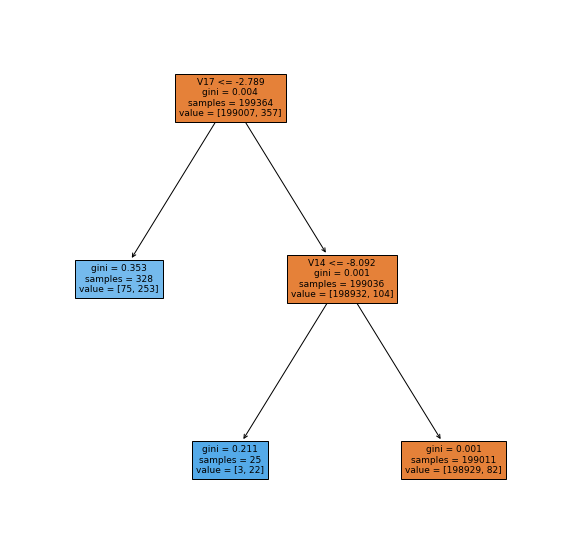

In [80]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [81]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- V17 <= -2.79
|   |--- weights: [75.00, 253.00] class: 1
|--- V17 >  -2.79
|   |--- V14 <= -8.09
|   |   |--- weights: [3.00, 22.00] class: 1
|   |--- V14 >  -8.09
|   |   |--- weights: [198929.00, 82.00] class: 0



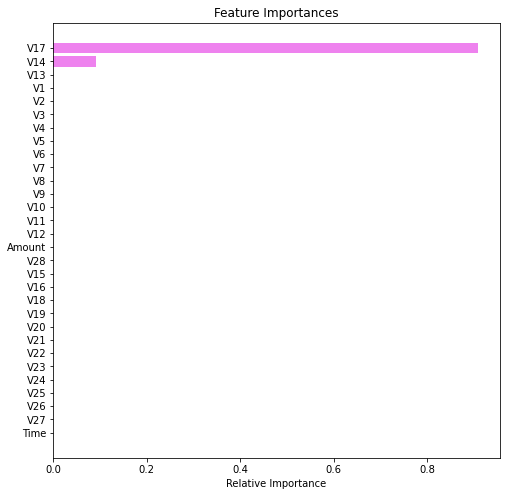

In [82]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Decision tree after pre-pruning has given similar feature importance and decision rules.

### Comparing Model Performance 

In [83]:
# defining list of model
models = [lg1]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score1(model, X_train1, X_test1, y_train, y_test, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [84]:
# defining list of model
models = [dTree,estimator]


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score2(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [133]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'Decision Tree','Decision Tree(pre-pruned)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 


new_row = {'Model':'Logistic Regression with precision-recall curve threshold', 'Train_Accuracy':0.9992927509480147, 'Test_Accuracy':0.9992509626300574, 
           'Train_Recall':0.8067226890756303,'Test_Recall':0.7407407407407407,'Train_Precision':0.8,
           'Test_Precision':0.7751937984496124}

new_row1 = {'Model':'Logistic Regression with optimal threshold', 'Train_Accuracy':0.9618637266507494, 'Test_Accuracy':0.9616586496260665, 
           'Train_Recall':0.9159663865546218,'Test_Recall':0.8740740740740741,'Train_Precision':0.041392405063291136,
           'Test_Precision':0.034942256440627775}


#append rows to the dataframe
comparison_frame = comparison_frame.append(new_row, ignore_index=True)
comparison_frame = comparison_frame.append(new_row1, ignore_index=True)

comparison_frame


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.999253,0.999181,0.658263,0.585185,0.896947,0.849462
1,Decision Tree,1.000000,0.999146,1.000000,0.733333,1.000000,0.727941
2,Decision Tree(pre-pruned),0.999197,0.999181,0.770308,0.703704,0.779037,0.760000
3,Logistic Regression with precision-recall curv...,0.999293,0.999251,0.806723,0.740741,0.800000,0.775194
4,Logistic Regression with optimal threshold,0.961864,0.961659,0.915966,0.874074,0.041392,0.034942


#### From the models above,the best model for giving us the highest recall is the logistic regression optimal threshold, followed by the logistic regression with precision-recall curve. But if the bank wants an harmonic of both the precision and the recall, then the pruned decision tree can be used.